In [21]:
# import Numpy, Pandas
import time
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from pandas.core.frame import DataFrame

In [22]:
# load the all data to a dictionary
path = ('resources/Participant-01.csv')
data_file = pd.read_csv(path)

In [23]:
# show brief information of dataframe
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          5867 non-null   object 
 1   Finish         5867 non-null   object 
 2   Steps (count)  5867 non-null   float64
dtypes: float64(1), object(2)
memory usage: 137.6+ KB


In [24]:
# display the complete imported data
print(data_file)

                  Start             Finish  Steps (count)
0     31-Dec-2021 23:00  01-Jan-2022 00:00       0.000000
1     01-Jan-2022 00:00  01-Jan-2022 01:00       0.000000
2     01-Jan-2022 01:00  01-Jan-2022 02:00       0.000000
3     01-Jan-2022 02:00  01-Jan-2022 03:00       0.000000
4     01-Jan-2022 03:00  01-Jan-2022 04:00       0.000000
...                 ...                ...            ...
5862  02-Sep-2022 04:00  02-Sep-2022 05:00       9.000000
5863  02-Sep-2022 05:00  02-Sep-2022 06:00       0.000000
5864  02-Sep-2022 06:00  02-Sep-2022 07:00     410.584935
5865  02-Sep-2022 07:00  02-Sep-2022 08:00    1153.415065
5866  02-Sep-2022 08:00  02-Sep-2022 09:00       1.000000

[5867 rows x 3 columns]


## This step is to clean the data. My criterion for judging whether the data is valuable is that the data cannot be 0.

In [25]:
# Delete all rows where Steps (count) is 0
data_file = data_file.drop(data_file[data_file['Steps (count)'] == 0].index)

## In the following cells, I extracted the middle point of each valid time period to facilitate the drawing of statistical graphs.

In [26]:
# Two functions to define the midpoint of a date
def get_time(DateTime):
    DateTime = datetime.strptime(DateTime,'%d-%b-%Y %H:%M')
    return DateTime

def mid_point(start, finish):
    start, finish = get_time(start), get_time(finish)
    return start+(finish-start)/2

In [27]:
# Process the Start and Finish columns
list, count = [], 0
for m in data_file['Start']:
    list.append(m)
for n in data_file['Finish']:
    list[count] = list[count]+"/"+n
    count+=1

## At this point, the middle point and the corresponding count() are all there, and they are made into a DataFrame.

In [28]:
# Make new DataFrame with mid and count
mids, steps = [], []
for i in list:
    start, finish = i.split("/")
    mid = mid_point(start, finish)
    mids.append(mid)
for i in data_file['Steps (count)']:
    steps.append(i)
mid_step = {
    "mid": mids,
    "steps": steps
}
mid_step = DataFrame(mid_step)

Text(0, 0.5, 'Count')

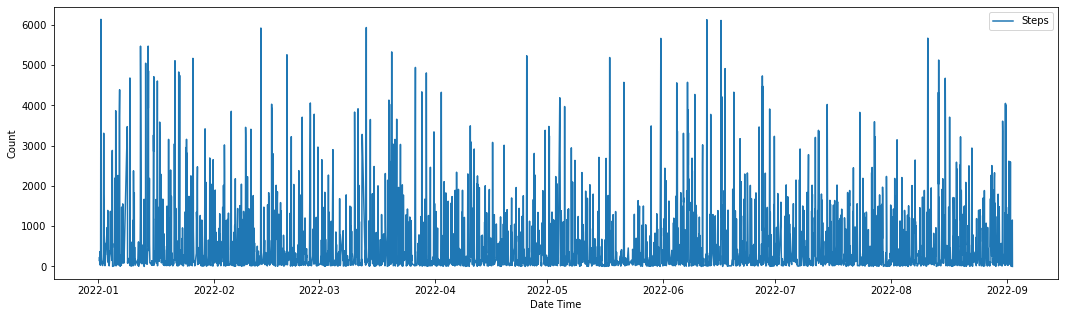

In [29]:
# Draw the graph based on mid and steps
plt.figure(figsize=(18,5))
mid_step = mid_step.sort_values('mid', ascending=True)
plt.plot(mid_step['mid'], mid_step['steps']) # add text labels to the plot
plt.legend(["Steps"])
plt.xlabel('Date Time')
plt.ylabel('Count')

## Next, get the day of the week this date is. Make a DateFrame for each day of the week.

In [30]:
# other dataframes from weekdays
mid_weekday_all = []
for m in mids:
    n = m.weekday()
    mid_weekday_all.append(n)

mid_weekday_step = {
    "mid_weekday" : mid_weekday_all,
    "steps" : steps
}

mid_weekday_step = DataFrame(mid_weekday_step)

In [31]:
# Separate the data according to the day of the week.
names = locals()  # call dynamic variable name
for i in range(1,8):
    item = mid_weekday_step[mid_weekday_step.mid_weekday == i]
    names['mid_' + str(i) ] = item

## In the next two cells, I first separated the DataFrame, changed them one by one, and then merged them together.

In [32]:
# This step should be written concisely, I will improve it later.
mid_1 = mid_1.rename(columns = {'steps':'Mon'}).reset_index(drop=True)
mid_2 = mid_2.rename(columns = {'steps':'Tue'}).reset_index(drop=True)
mid_3 = mid_3.rename(columns = {'steps':'Wed'}).reset_index(drop=True)
mid_4 = mid_4.rename(columns = {'steps':'Thu'}).reset_index(drop=True)
mid_5 = mid_5.rename(columns = {'steps':'Fri'}).reset_index(drop=True)
mid_6 = mid_6.rename(columns = {'steps':'Sat'}).reset_index(drop=True)
mid_7 = mid_7.rename(columns = {'steps':'Sun'}).reset_index(drop=True)

In [33]:
# Aggregate the DataFrame of each day of the week into a DataFrame.
final = pd.concat([mid_1['Mon'],\
                   mid_2['Tue'],\
                   mid_3['Wed'],\
                   mid_4['Thu'],\
                   mid_5['Fri'],\
                   mid_6['Sat'],\
                   mid_7['Sun'],], axis = 1)

<AxesSubplot:>

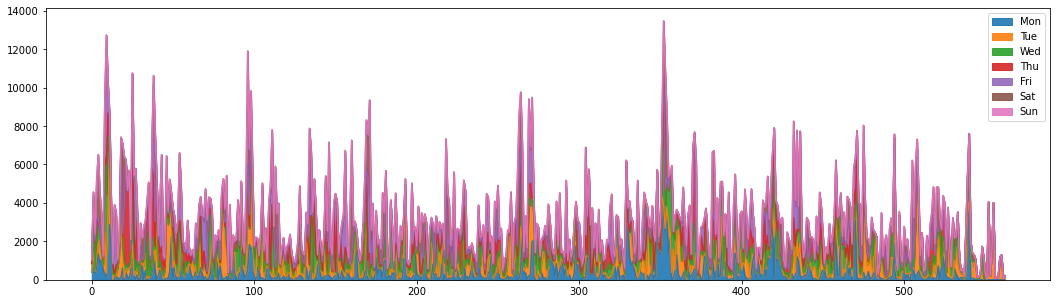

In [34]:
# show the plot
final.plot.area(stacked=True,alpha = 0.9, figsize=(18,5))

## I also tried other types of charts, but none worked as well as this stacked area chart.

## In general, the number of steps of the study subjects changed with the change of the week, but the details still need to be analyzed in detail, and the code needs to be more targeted.